#### Name：SimulateDatasets_Visualization
#### People：Ke Liu

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import matplotlib.font_manager as font_manager
font_manager.fontManager.addfont('/home/qukun/liuke/miniconda3/fonts/Arial.ttf')
mpl.rcParams["font.sans-serif"] = "Arial"
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.serif'] = ['Arial']

In [2]:
dataset_list = ['dataset1','dataset2','dataset3']
simulate_path = '/home/qukun/liuke/workspace/benchmark/data/simulate/'

In [3]:
for data in dataset_list:
    locals()[data+'_simple'] = pd.read_csv(simulate_path+'dataset/'+data+'.simple.bed',sep='\t',header=None)
    locals()[data+'_chimeric'] = pd.read_csv(simulate_path+'dataset/'+data+'.chimeric.bed',sep='\t',header=None)
    locals()[data+'_pos'] = pd.read_csv(simulate_path+data+'/'+data+'.50/'+data+'.50.pos.csv', sep='\t')
    locals()[data+'_neg'] = pd.read_csv(simulate_path+data+'/'+data+'.50/'+data+'.50.pos.csv', sep='\t')
    locals()[data+'_len_list'] = list(locals()[data+'_simple'][3])
    locals()[data+'_fragn_dict']= {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,'others':0}
    locals()[data+'_fragn_dict'][1]=len(locals()[data+'_simple'])
    locals()[data+'_pos_bed'] = pd.read_csv(simulate_path+data+'/'+data+'.50/'+data+'.50.pos.bed', header=None, sep='\t')
    locals()[data+'_bed'] = pd.read_csv(simulate_path+'dataset/annotation/'+data+'.merge.bed', header=None, sep='\t')
    locals()[data+'_tab'] = pd.read_csv(simulate_path+'dataset/annotation/'+data+'.tab',sep='\t',header=None,index_col=0)
    locals()[data+'_pos_tab'] = pd.read_csv(simulate_path+'dataset/annotation/'+data+'.pos.tab',sep='\t',header=None,index_col=0)
    for i in locals()[data+'_chimeric'][4].unique():
        if len(locals()[data+'_chimeric'][locals()[data+'_chimeric'][4]==i])>9:
            locals()[data+'_fragn_dict']['others']+=1
        else: locals()[data+'_fragn_dict'][len(locals()[data+'_chimeric'][locals()[data+'_chimeric'][4]==i])]+=1
        locals()[data+'_len_list'].append(locals()[data+'_chimeric'][locals()[data+'_chimeric'][4]==i][3].sum())

### Chromocome origin

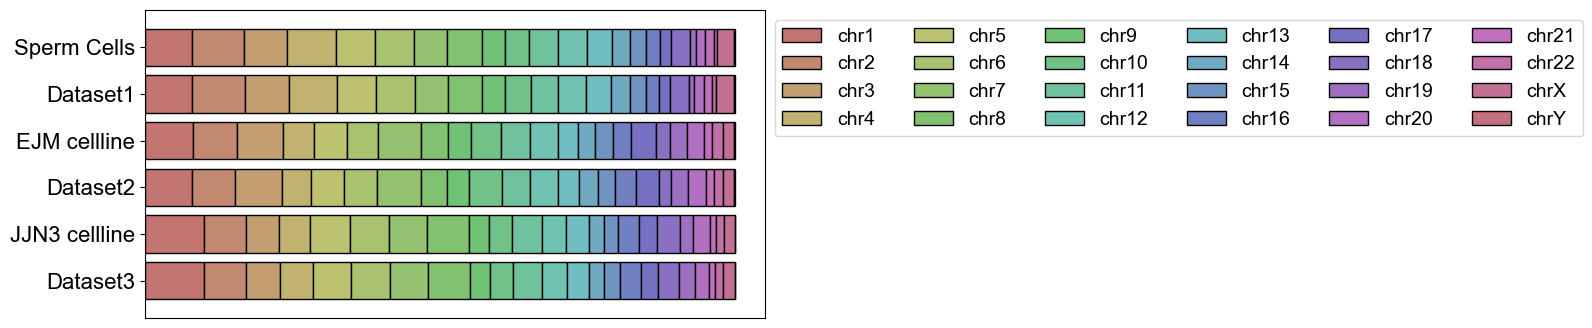

In [4]:
chr_list = ['chr'+str(i+1) for i in range(22)]+['chrX', 'chrY']
colors = sns.hls_palette(24,s=.4)#sns.cubehelix_palette(start=0, rot=-2, dark=.2, light=.8, n_colors=24)
color_dict = dict(zip(chr_list, colors))

fig, ax1 = plt.subplots(figsize=(8,4))

btm=0
for i in chr_list:
    plt.barh(y=.25,height=.2,width=dataset1_bed[0].value_counts()[i]/len(dataset1_bed),left=btm,label=i,color=color_dict[i],edgecolor='black')
    btm += dataset1_bed[0].value_counts()[i]/len(dataset1_bed)

plt.legend(loc=2,bbox_to_anchor=(1,1),fontsize=14,ncols=6)  
btm=0
for i in chr_list:
    plt.barh(y=0,height=.2,width=dataset1_pos_bed[0].value_counts()[i]/len(dataset1_pos_bed),left=btm,label=i,color=color_dict[i],edgecolor='black')
    btm += dataset1_pos_bed[0].value_counts()[i]/len(dataset1_pos_bed)

btm=0
for i in chr_list:
    plt.barh(y=.5,height=.2,width=dataset2_bed[0].value_counts()[i]/len(dataset2_bed),left=btm,label=i,color=color_dict[i],edgecolor='black')
    btm += dataset2_bed[0].value_counts()[i]/len(dataset2_bed)

    
btm=0
for i in chr_list:
    plt.barh(y=.75,height=.2,width=dataset2_pos_bed[0].value_counts()[i]/len(dataset2_pos_bed),left=btm,label=i,color=color_dict[i],edgecolor='black')
    btm += dataset2_pos_bed[0].value_counts()[i]/len(dataset2_pos_bed)
    

btm=0
for i in chr_list:
    plt.barh(y=1,height=.2,width=dataset3_bed[0].value_counts()[i]/len(dataset3_bed),left=btm,label=i,color=color_dict[i],edgecolor='black')
    btm += dataset3_bed[0].value_counts()[i]/len(dataset3_bed)

    
btm=0
for i in chr_list:
    plt.barh(y=1.25,height=.2,width=dataset3_pos_bed[0].value_counts()[i]/len(dataset3_pos_bed),left=btm,label=i,color=color_dict[i],edgecolor='black')
    btm += dataset3_pos_bed[0].value_counts()[i]/len(dataset3_pos_bed)
ax1.set_ylim(-.2,1.45)
ax1.invert_yaxis()
ax1.set_xticks([])
ax1.set_yticks([0,.25,.5,.75,1,1.25],['Sperm Cells', 'Dataset1', 'EJM cellline', 'Dataset2', 'JJN3 cellline', 'Dataset3'],rotation=0,fontsize=16)
plt.savefig('/home/qukun/liuke/workspace/benchmark/figure/published/sfigure1A.pdf', dpi=300, bbox_inches='tight')

### Chimeric Proportion

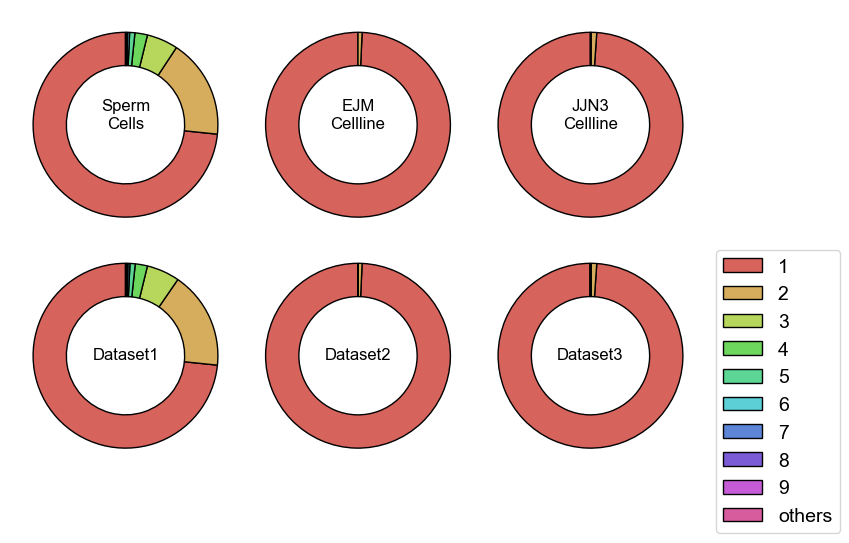

In [5]:
fig = plt.figure(figsize=(9,6))
fig = gs.GridSpec(10, 15, hspace=0, wspace=0)
for i in range(2):
    for j in range(3):
        locals()['ax'+str(i)+str(j)] = plt.subplot(fig[5*(i):5*(i)+5,5*j:5*j+5])
ax00.pie(list(dataset1_pos.fragN.value_counts().values),
        labels=list(dataset1_pos.fragN.value_counts().index),
        colors = sns.hls_palette(10,s=.6),
        startangle=90,
        radius=1,
        labeldistance=None,
        wedgeprops={'width':0.36,'edgecolor':'black'}) 
ax10.pie(list(dataset1_fragn_dict.values()),
        labels=list(dataset1_fragn_dict.keys()),
        colors = sns.hls_palette(10,s=.6),
        startangle=90,
        radius=1,
        labeldistance=None,
        wedgeprops={'width':0.36,'edgecolor':'black'})  
ax01.pie(list(dataset2_pos.fragN.value_counts().values),
        labels=list(dataset2_pos.fragN.value_counts().index),
        colors = sns.hls_palette(10,s=.6),
        startangle=90,
        radius=1,
        labeldistance=None,
        wedgeprops={'width':0.36,'edgecolor':'black'}) 
ax11.pie(list(dataset2_fragn_dict.values()),
        labels=list(dataset1_fragn_dict.keys()),
        colors = sns.hls_palette(10,s=.6), 
        startangle=90,
        radius=1,
        labeldistance=None,
        wedgeprops={'width':0.36,'edgecolor':'black'})
ax02.pie(list(dataset3_pos.fragN.value_counts().values),
        labels=list(dataset3_pos.fragN.value_counts().index),
        colors = sns.hls_palette(10,s=.6),
        startangle=90,
        radius=1,
        labeldistance=None,
        wedgeprops={'width':0.36,'edgecolor':'black'}) 
ax12.pie(list(dataset3_fragn_dict.values()),
        labels=list(dataset1_fragn_dict.keys()),
        colors = sns.hls_palette(10,s=.6), 
        startangle=90,
        radius=1,
        labeldistance=None,
        wedgeprops={'width':0.36,'edgecolor':'black',})
ax00.set_title('Sperm\nCells',y=0.45,fontsize=12);ax01.set_title('EJM\nCellline',y=0.45,fontsize=12);ax02.set_title('JJN3\nCellline',y=0.45,fontsize=12)
ax10.set_title('Dataset1',y=0.45,fontsize=12);ax11.set_title('Dataset2',y=0.45,fontsize=12);ax12.set_title('Dataset3',y=0.45,fontsize=12)
plt.legend(title="",loc=2,bbox_to_anchor=(1,1),fontsize=14)
plt.savefig('/home/qukun/liuke/workspace/benchmark/figure/published/sfigure1B.pdf', dpi=300, bbox_inches='tight')

### Length Distribution

Text(0.5, 0, '')

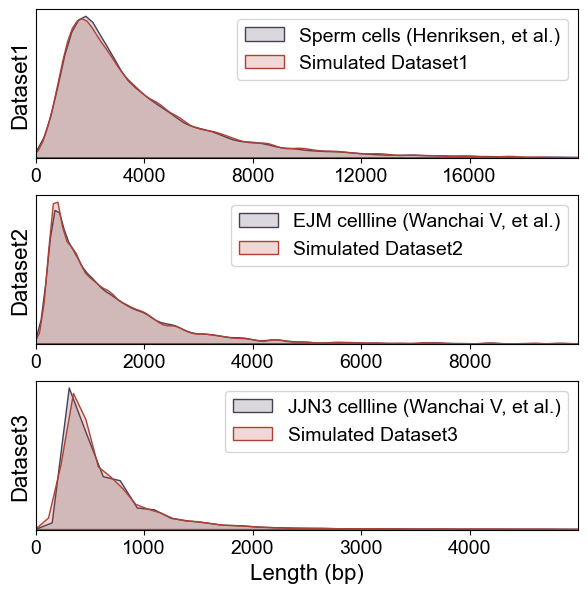

In [6]:
fig = plt.figure(figsize=(7,7))
fig = gs.GridSpec(30, 30, hspace=300, wspace=0)
for i in range(1,4):
    locals()['ax'+str(i)] = plt.subplot(fig[10*(i-1):10*(i-1)+9,0:30])
sns.kdeplot(dataset1_len_list,bw_adjust=.5,color='#4a3e53',fill=True,label='Sperm cells (Henriksen, et al.)',ax=ax1, alpha=.2)
sns.kdeplot(dataset1_pos.length,bw_adjust=.5,color='#AF4034',fill=True,label='Simulated Dataset1',ax=ax1, alpha=.2)
ax1.set_xlim(0,20000)
ax1.set_xticks(range(0,20000,4000),range(0,20000,4000),fontsize=14)
sns.kdeplot(dataset2_len_list,bw_adjust=.5,color='#4a3e53',fill=True,label='EJM cellline (Wanchai V, et al.)',ax=ax2, alpha=.2)
sns.kdeplot(dataset2_pos.length,bw_adjust=.5,color='#AF4034',fill=True,label='Simulated Dataset2',ax=ax2, alpha=.2)
ax2.set_xlim(0,10000)
ax2.set_xticks(range(0,10000,2000),range(0,10000,2000),fontsize=14)
sns.kdeplot(dataset3_len_list,bw_adjust=.5,color='#4a3e53',fill=True,label='JJN3 cellline (Wanchai V, et al.)',ax=ax3, alpha=.2)
sns.kdeplot(dataset3_pos.length,bw_adjust=.5,color='#AF4034',fill=True,label='Simulated Dataset3',ax=ax3, alpha=.2)
ax3.set_xlim(0,5000)
ax3.set_xticks(range(0,5000,1000),range(0,5000,1000),fontsize=14)
ax1.set_yticks([]);ax2.set_yticks([]);ax3.set_yticks([])
ax1.set_ylabel('Dataset1',fontsize=16,color='black');ax2.set_ylabel('Dataset2',fontsize=16,color='black');ax3.set_ylabel('Dataset3',fontsize=16,color='black')
ax1.legend(loc=1,bbox_to_anchor=(1,1),fontsize=14)
ax2.legend(loc=1,bbox_to_anchor=(1,1),fontsize=14)
ax3.legend(loc=1,bbox_to_anchor=(1,1),fontsize=14)
ax3.set_xlabel('Length (bp)',fontsize=16,color='black');ax1.set_xlabel('');ax2.set_xlabel('')
#plt.savefig('/home/qukun/liuke/workspace/benchmark/figure/published/figure1B.pdf', dpi=300, bbox_inches='tight')